In [1]:
import act
import glob
import matplotlib.pyplot as plt
import json
import xarray as xr
import numpy as np

In [2]:
#Read in ARM Live Data Webservice Token and Username
with open('./token.json') as f:
    data = json.load(f)
username = data['username']
token = data['token']

In [3]:
datastream = 'sgpmplpolfsC1.b1'

In [4]:
#Download MPL Data
files = glob.glob(''.join(['./',datastream,'/*nc']))
mpl_obj = act.io.armfiles.read_netcdf(files)

In [5]:
mpl_obj = mpl_obj.rename({'range':'mpl_range'})
mpl_obj = act.corrections.mpl.correct_mpl(mpl_obj)

NameError: name 'startdate' is not defined

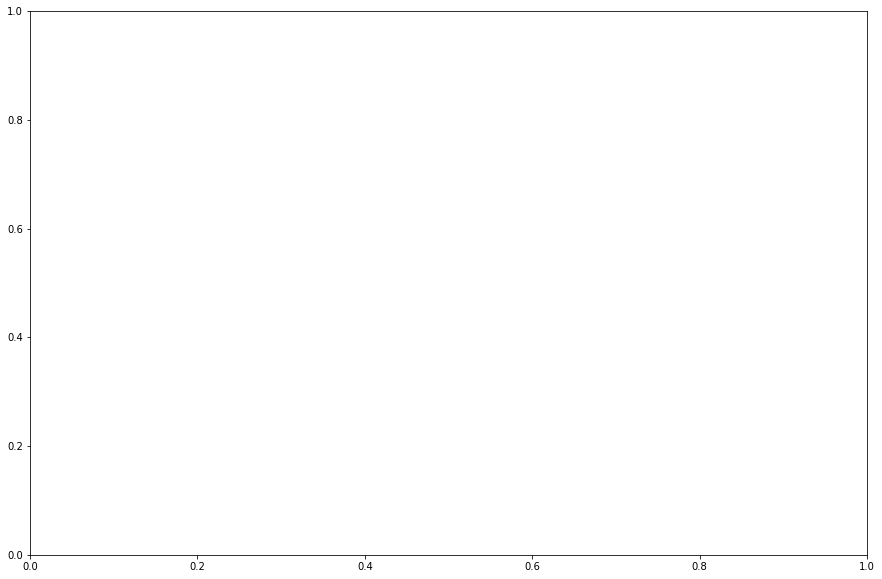

In [6]:
#Plot  Data
display = act.plotting.TimeSeriesDisplay(mpl_obj,figsize=(15,10),subplot_shape=(1,))
title = 'SGP MPL Data from '+startdate+' to '+enddate
display.plot('signal_return_co_pol',set_title=title,subplot_index=(0,),cbmin=-20, cbmax=20, cmap='jet')
display.set_yrng([0,15])

plt.show()